# Name - Harsh Maurya
# TSF_TASK_3
# Task 3 - find out the weak areas where you can work to make more profit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df= pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df['Postal Code']= df['Postal Code'].astype('object')


In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
lb = df[['Sales','Quantity','Discount','Profit']]
lb.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [11]:
corr = lb.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


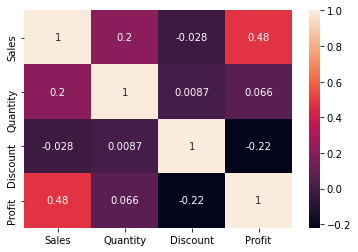

In [12]:
sns.heatmap(corr,annot=True)

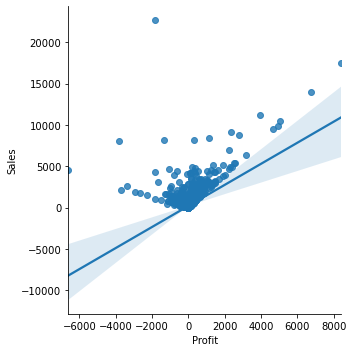

In [13]:
sns.lmplot('Profit','Sales',data=df)

In [14]:
df['Profit'].min()

-6599.978

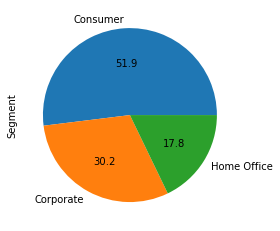

In [15]:
df['Segment'].value_counts().plot.pie(autopct = '%.1f')

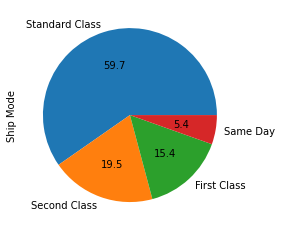

In [16]:
df['Ship Mode'].value_counts().plot.pie(autopct = '%.1f')

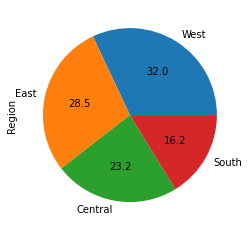

In [17]:
df['Region'].value_counts().plot.pie(autopct = '%.1f')

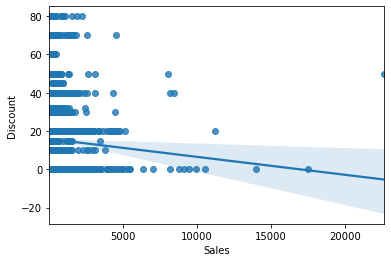

In [18]:
sns.regplot(df['Sales'],df['Discount']*100)

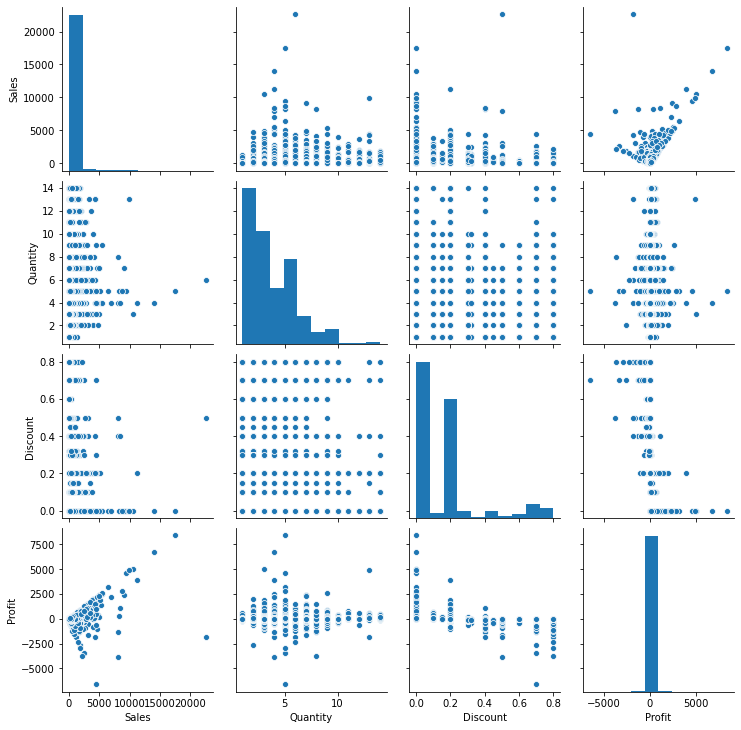

In [19]:
sns.pairplot(lb)

In [20]:
category = df['Category'].unique()
category_counts = df['Category'].value_counts()

In [21]:
category_counts

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

Text(0, 0.5, 'Quantity')

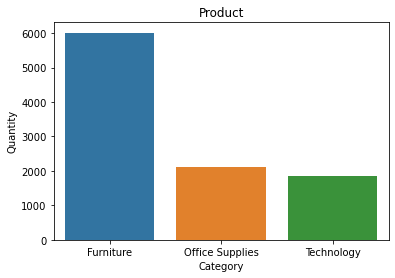

In [22]:
sns.barplot(category,category_counts)
plt.title('Product')
plt.xlabel('Category')
plt.ylabel('Quantity')

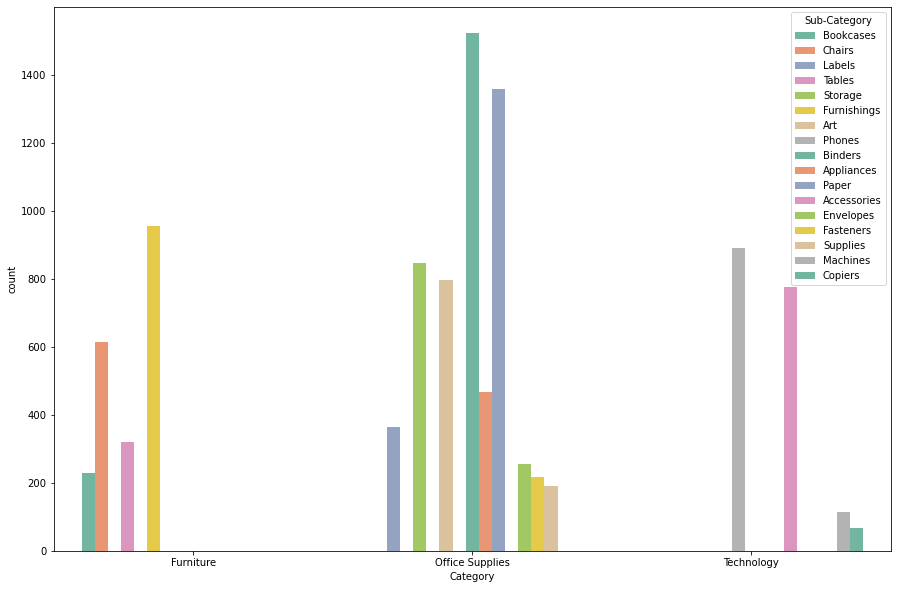

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(df['Category'],hue=df['Sub-Category'],palette='Set2')

Text(0.5, 1.0, 'Region Wise Profit')

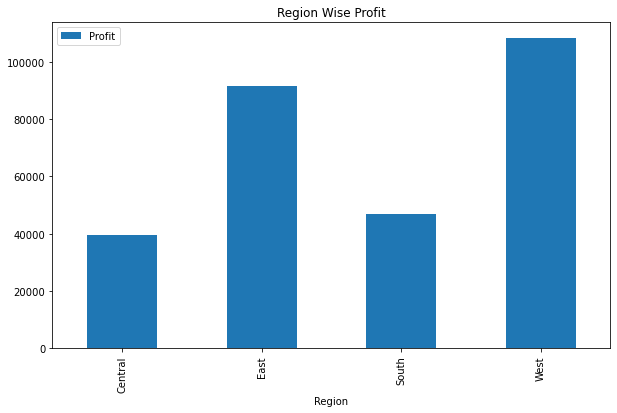

In [24]:
df[['Region','Profit']].groupby(['Region'],axis=0).sum().plot(kind='bar',figsize=(10,6))
plt.title('Region Wise Profit')

In [25]:
df[['Sub-Category','Profit']].groupby(['Sub-Category'],axis=0).sum()

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6524.6118
Binders,30228.0003
Bookcases,-3472.5560
Chairs,26567.1278
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


Text(0.5, 1.0, 'Profit Sub-Category Wise')

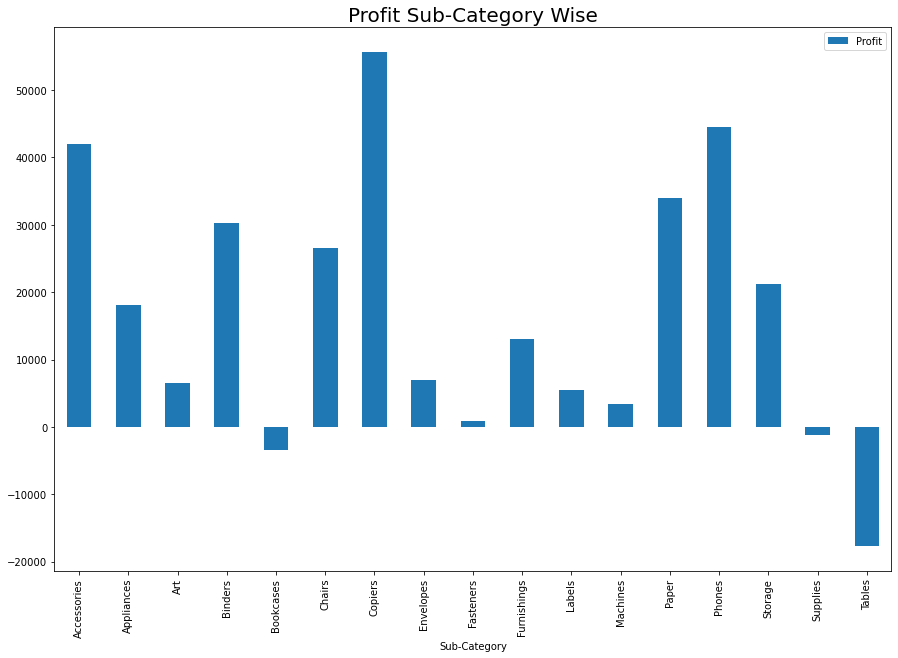

In [26]:

df[['Sub-Category','Profit']].groupby(['Sub-Category'],axis=0).sum().plot(kind='bar',figsize=(15,10))
plt.title('Profit Sub-Category Wise',fontsize=20)

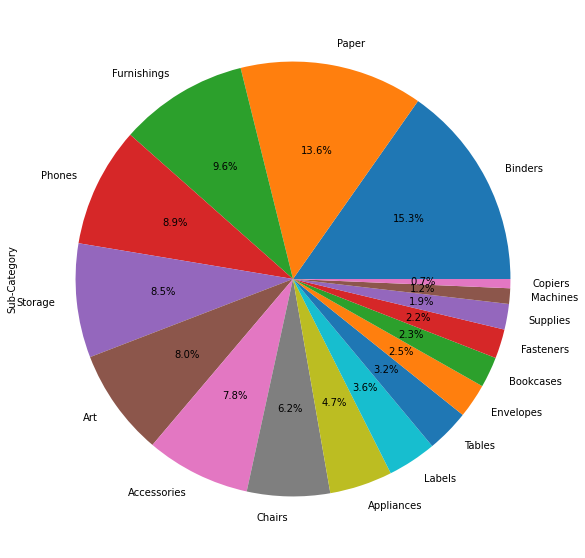

In [27]:
plt.figure(figsize=(15,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


In [28]:
data = df[['Category','Sub-Category','Profit']]
data = data.groupby(['Sub-Category','Category'],axis=0).sum().sort_values('Profit',ascending=False)

In [29]:
data

,,Profit
Sub-Category,Category,
Copiers,Technology,55617.8249
Phones,Technology,44515.7306
Accessories,Technology,41936.6357
Paper,Office Supplies,33944.2395
Binders,Office Supplies,30228.0003
Chairs,Furniture,26567.1278
Storage,Office Supplies,21278.8264
Appliances,Office Supplies,18138.0054
Furnishings,Furniture,13052.7230


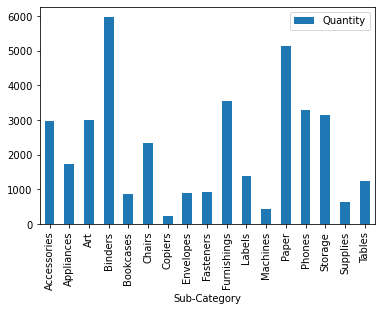

In [30]:
data = df[['Sub-Category','Quantity']]
data = data.groupby('Sub-Category',axis=0).sum().plot.bar()

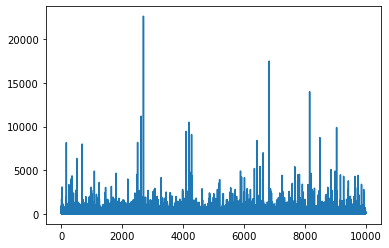

In [31]:
df['Sales'].plot()

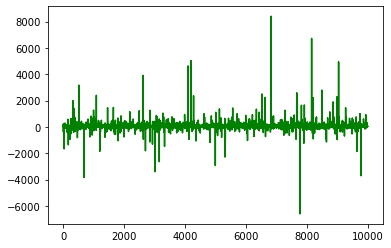

In [32]:
df['Profit'].plot(c='g')

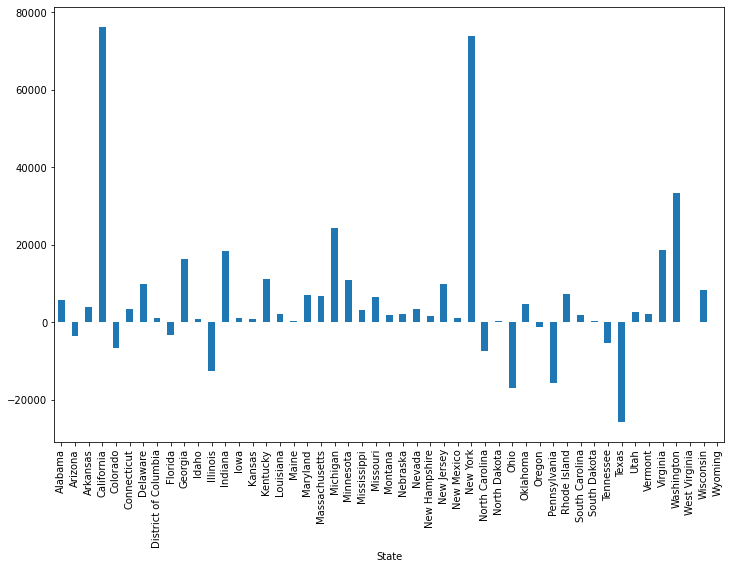

In [33]:
plt.figure(figsize=(12,8))
st = df.groupby(['State'])['Profit'].sum().plot.bar()

In [34]:
# Weak Region:-South Region
# Technology Product is lowest in Quantity Wise.
# In sub-category Profit wise Negative Profit is 1.) Table
#                                                2.) Bookcases
#                                                3.) Supplies
# State Wise Highest Negative profit- Texas
# We should remove negative Profit.
# I want to focus on those area which has atleast some Profit>0
